# Task_rt

## Task description

Each student is assigned a task consisting of two parts:
- Part A: Real-Time ECG Signal Processing — simulate and process ECG signal in real-time-like fashion.
- Part B: Kalman-Bucy Filtering — implement and simulate a Kalman-Bucy filter for a continuous stochastic system.

Students are expected to:
- Analyze and comment on system behavior and filter performance.
- Submit source code, plots, and a brief written interpretation.

Variant 6:
- ECG sampling rate = 250 Hz, duration = 12 s, block = 125 samples.
- Kalman-Bucy: $\dot{x}$ = −1.2x + w, y = x + v, Q = 0.3, R = 1.2

## Python code

### Part A: Real-Time ECG Signal Processing

Simulating real-time ECG filtering...


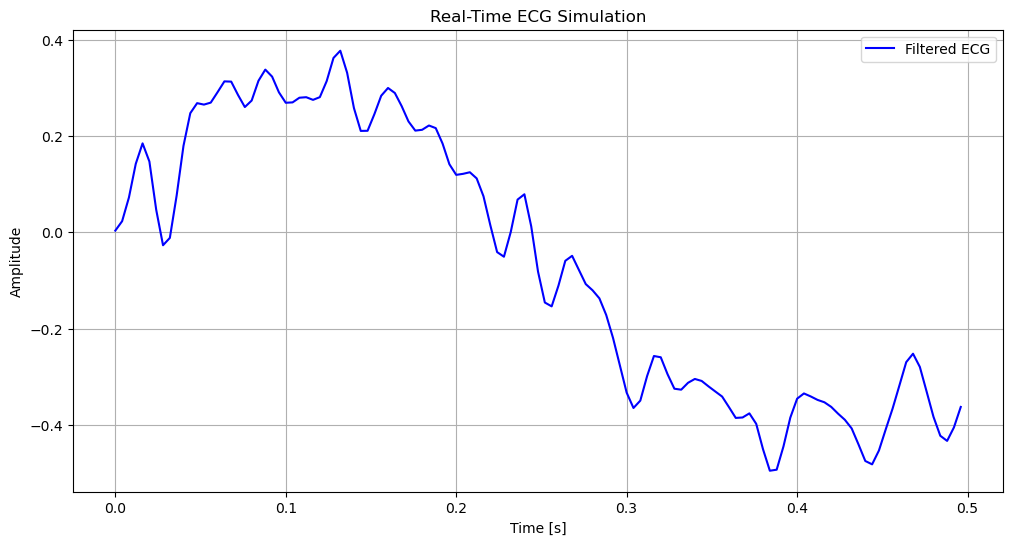

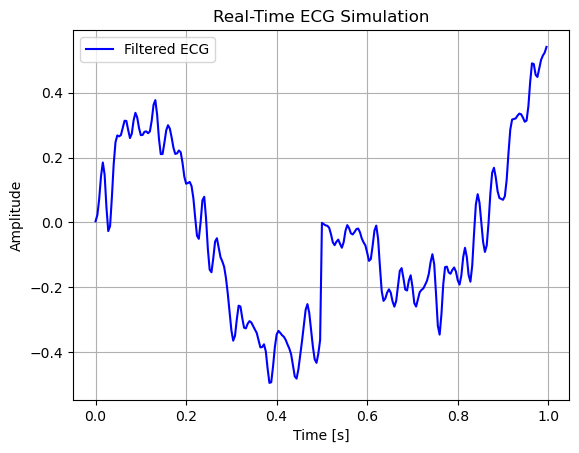

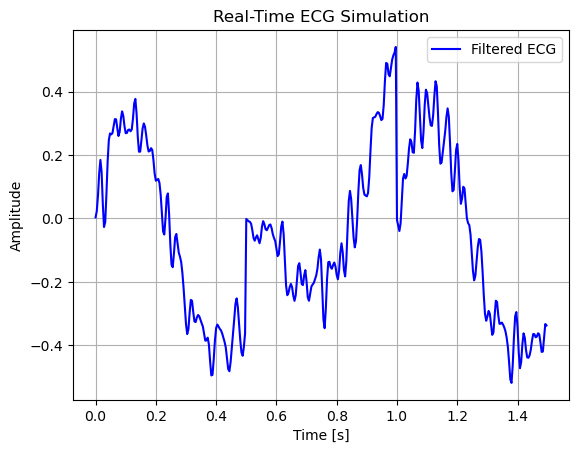

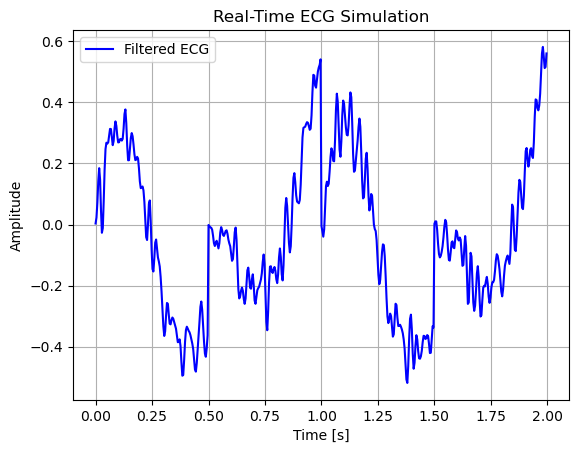

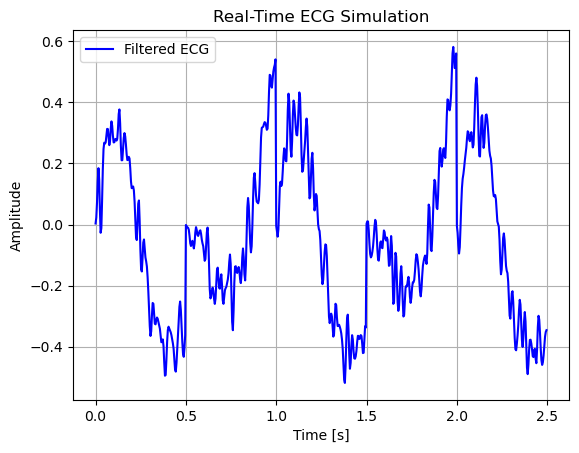

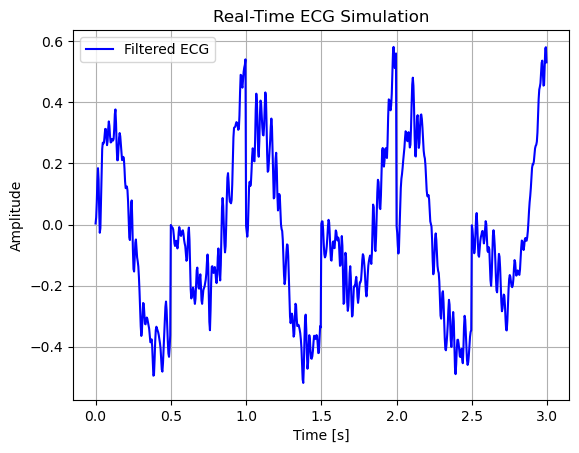

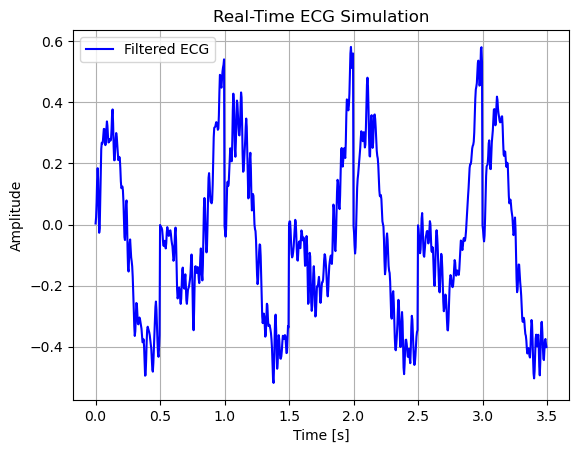

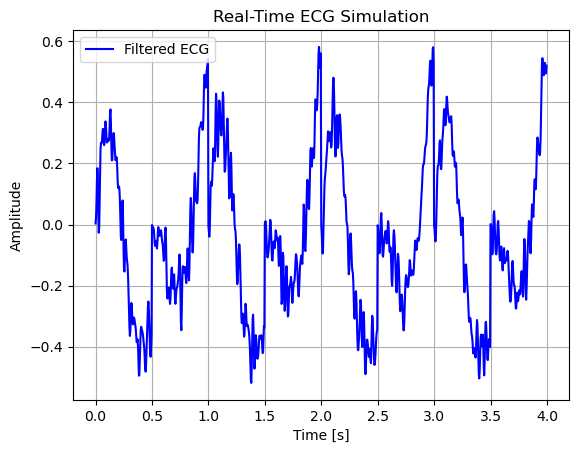

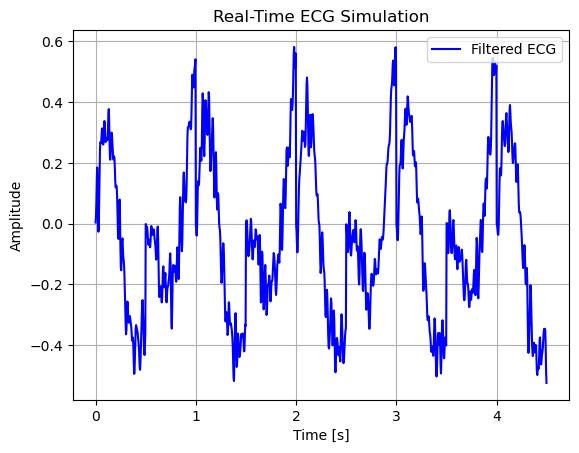

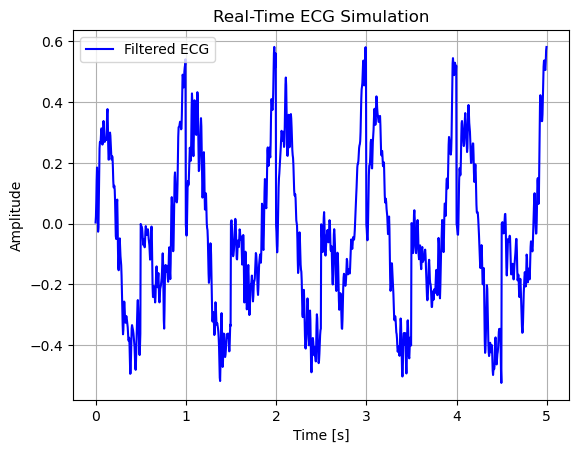

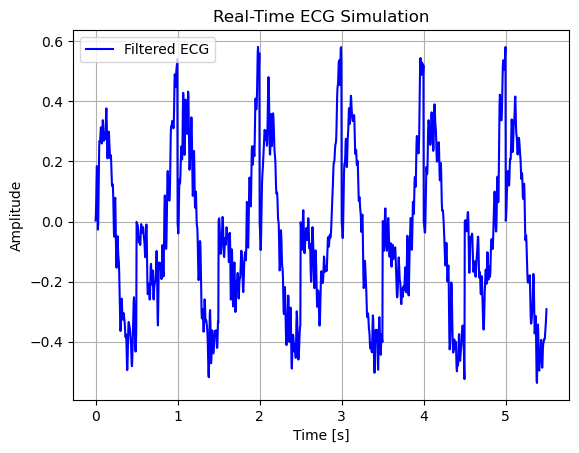

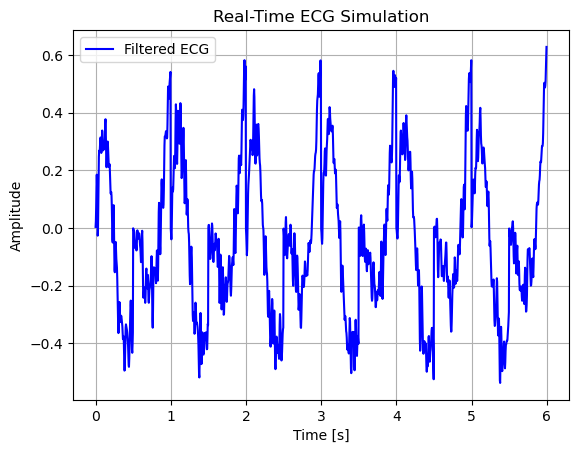

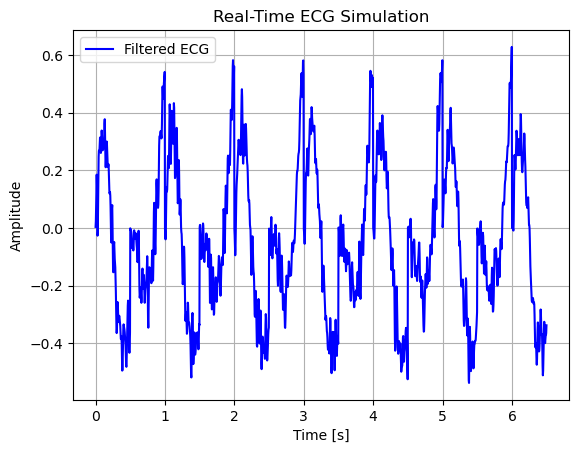

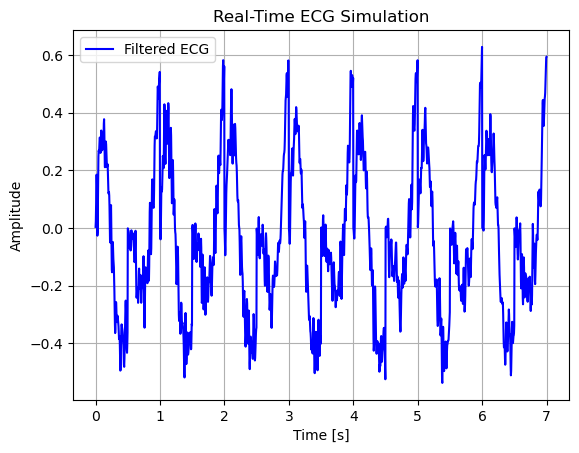

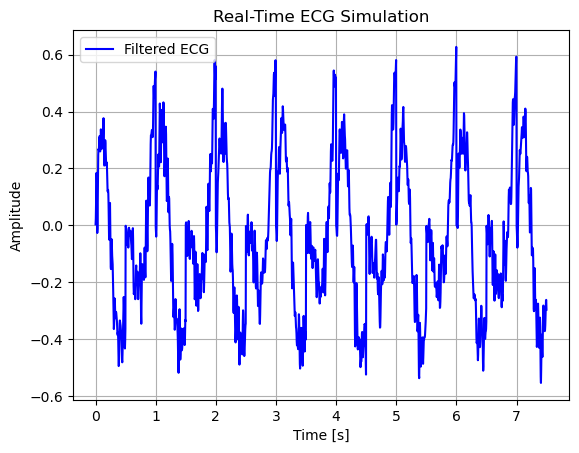

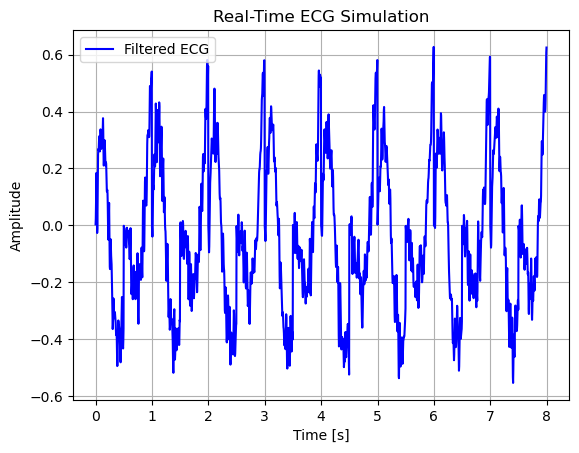

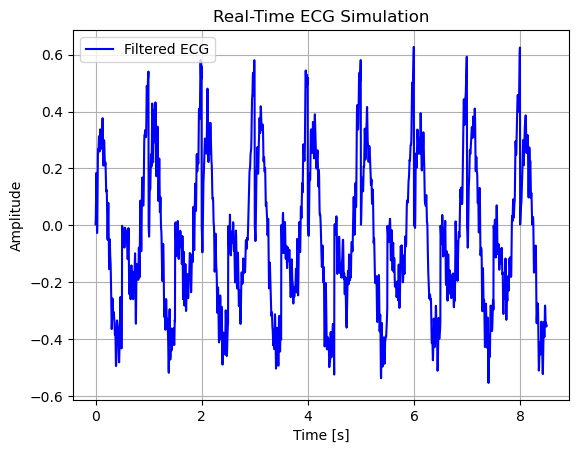

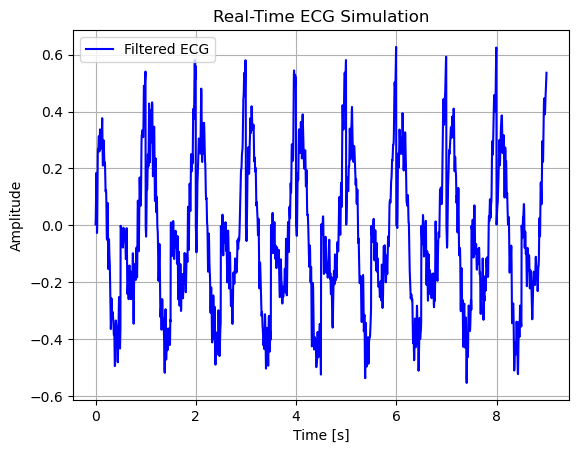

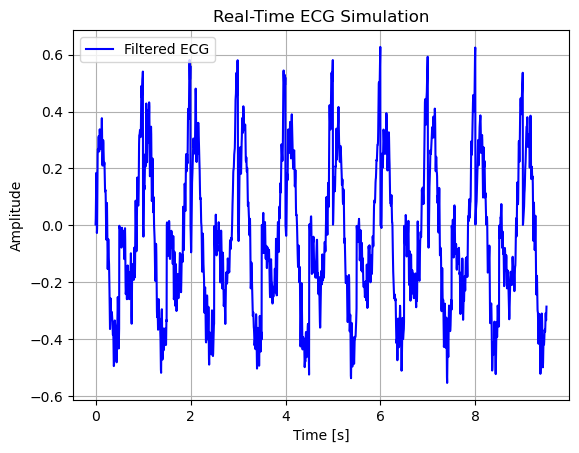

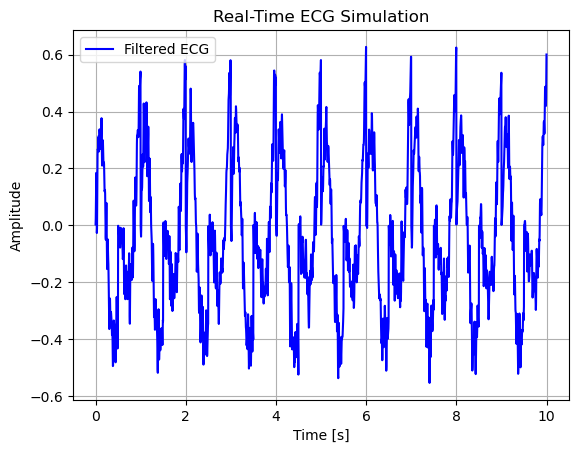

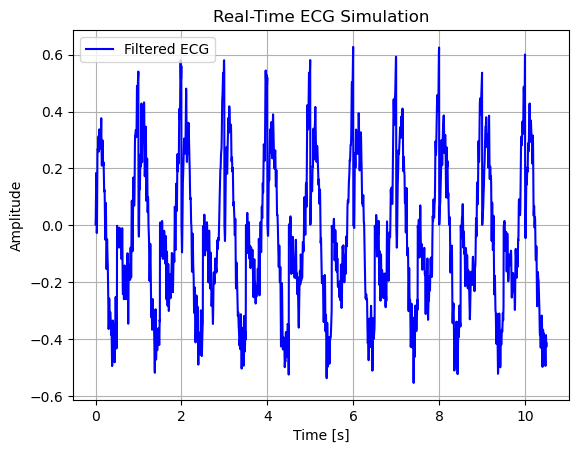

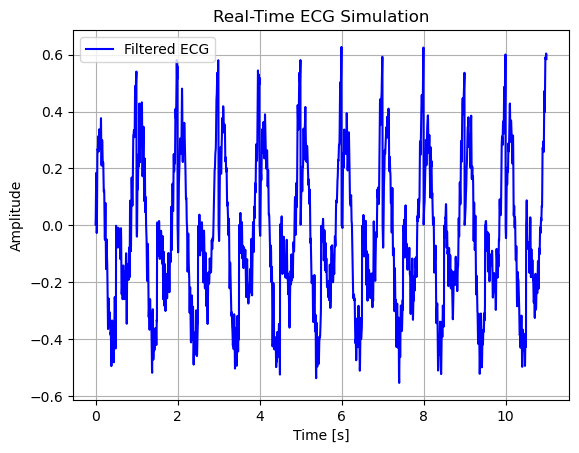

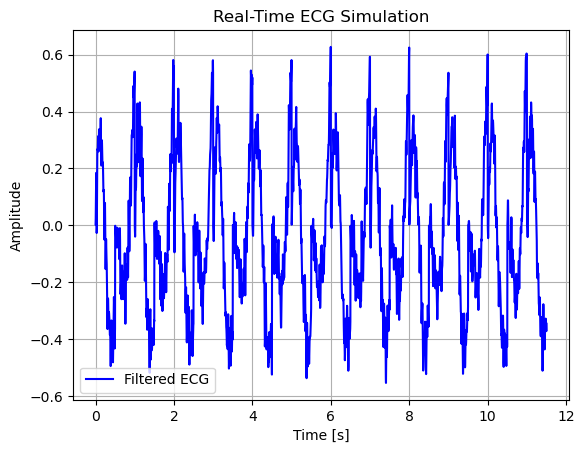

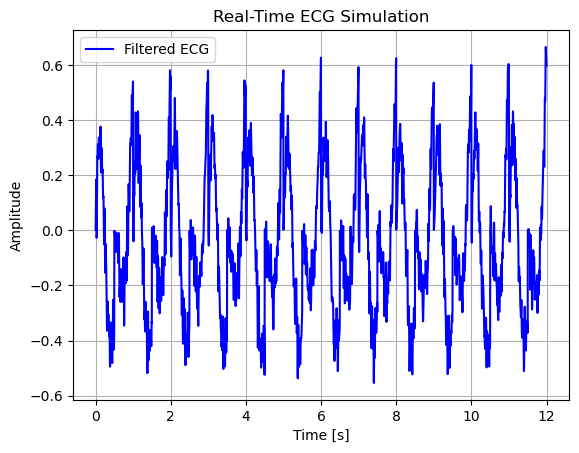

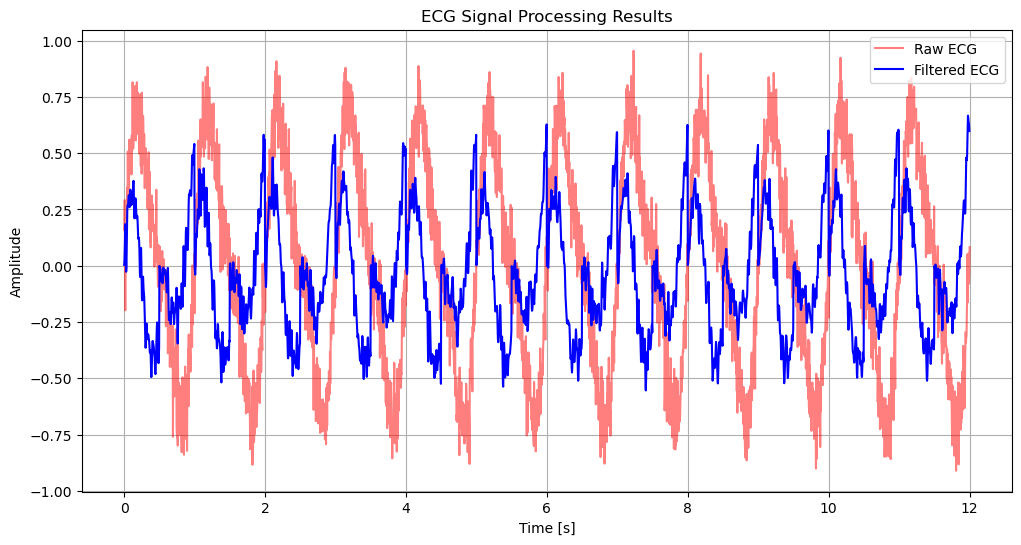

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.signal import butter, lfilter

# Generate synthetic ECG signal
def synthetic_ecg(fs, duration, heart_rate=60):
    t = np.linspace(0, duration, int(fs * duration))
    ecg = 0.6 * np.sin(2 * np.pi * heart_rate/60 * t) \
           + 0.2 * np.sin(2 * np.pi * 2 * heart_rate/60 * t) \
           + 0.1 * np.random.randn(len(t))  # Add noise
    return t, ecg

# Bandpass filter (0.5-40 Hz)
def bandpass_filter(signal, fs, lowcut=0.5, highcut=40.0, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return lfilter(b, a, signal)

# Simulate real-time processing
def simulate_real_time_processing(ecg_signal, fs, block_size=125):
    total_samples = len(ecg_signal)
    num_blocks = total_samples // block_size
    delay = block_size / fs  # Time per block

    processed_signal = []
    t_axis = []

    plt.figure(figsize=(12, 6))
    print("Simulating real-time ECG filtering...")
    
    for i in range(num_blocks):
        block = ecg_signal[i*block_size:(i+1)*block_size]
        filtered = bandpass_filter(block, fs)
        processed_signal.extend(filtered)
        t_axis.extend(np.arange(i*block_size, (i+1)*block_size) / fs)

        # Dynamic plot update (optional)
        plt.clf()
        plt.plot(t_axis, processed_signal, 'b-', label="Filtered ECG")
        plt.title("Real-Time ECG Simulation")
        plt.xlabel("Time [s]")
        plt.ylabel("Amplitude")
        plt.grid(True)
        plt.legend()
        plt.pause(0.001)
        time.sleep(delay)  # Simulate processing delay

    plt.show()
    return np.array(t_axis), np.array(processed_signal)

# Main execution
fs = 250  # Sampling rate (Hz)
duration = 12  # Duration (s)
t, ecg = synthetic_ecg(fs, duration)
t_axis, processed_ecg = simulate_real_time_processing(ecg, fs, block_size=125)

# Plot final results
plt.figure(figsize=(12, 6))
plt.plot(t, ecg, 'r-', alpha=0.5, label="Raw ECG")
plt.plot(t_axis, processed_ecg, 'b-', label="Filtered ECG")
plt.title("ECG Signal Processing Results")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

### Part B: Kalman-Bucy Filtering

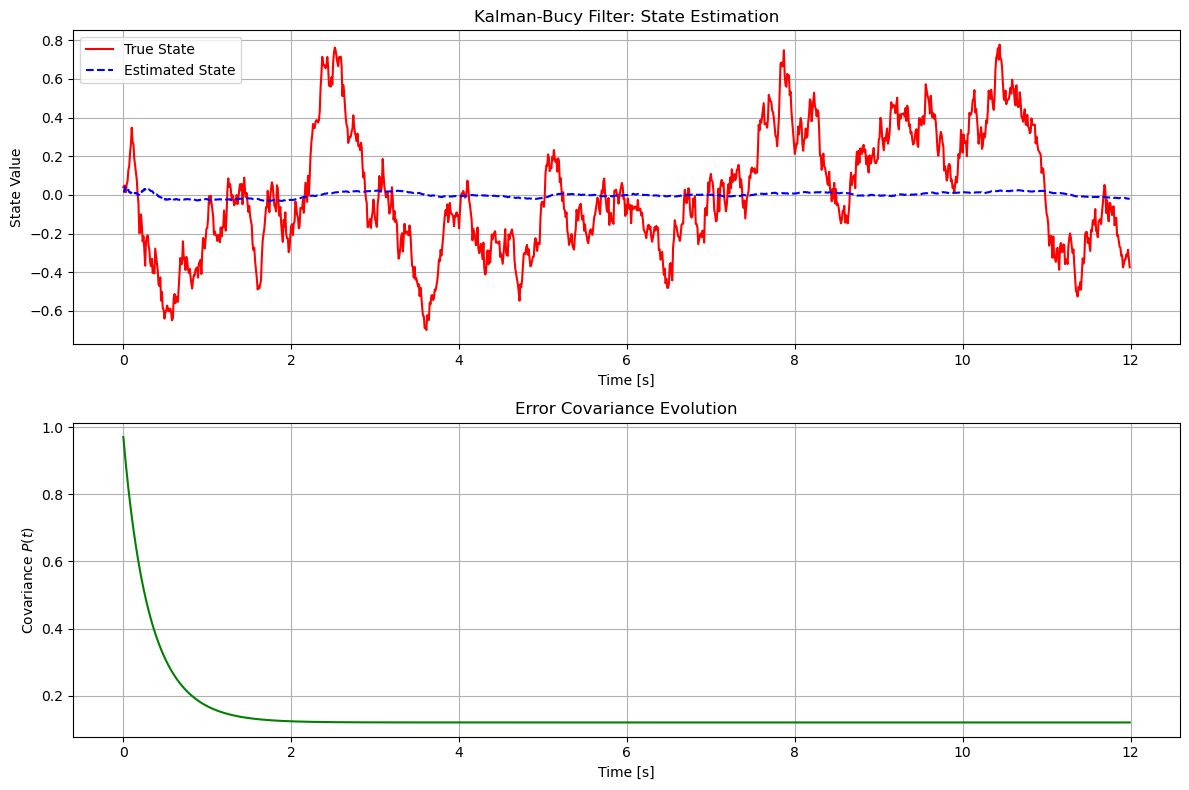

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Kalman-Bucy filter simulation
def kalman_bucy_simulation(T=12, dt=0.01, A=-1.2, C=1, Q=0.3, R=1.2):
    n_steps = int(T / dt)
    x_true = 0.0  # Initial true state
    x_hat = 0.0   # Initial state estimate
    P = 1.0       # Initial error covariance
    
    # History arrays
    t_vals = np.arange(0, T, dt)
    x_history = np.zeros(n_steps)
    xhat_history = np.zeros(n_steps)
    p_history = np.zeros(n_steps)
    
    for k in range(n_steps):
        # True system dynamics
        w = np.random.normal(0, np.sqrt(Q * dt))
        x_true = x_true + dt * (A * x_true) + w
        
        # Generate measurement
        v = np.random.normal(0, np.sqrt(R))
        y = C * x_true + v
        
        # Kalman-Bucy update
        K = P * C / R  # Kalman gain
        x_hat = x_hat + dt * (A * x_hat + K * (y - C * x_hat))
        P = P + dt * (2 * A * P + Q - K * C * P)
        
        # Store results
        x_history[k] = x_true
        xhat_history[k] = x_hat
        p_history[k] = P

    return t_vals, x_history, xhat_history, p_history

# Execute simulation
t, x_true, x_hat, P = kalman_bucy_simulation(T=12)

# Plot results
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(t, x_true, 'r-', label="True State")
plt.plot(t, x_hat, 'b--', label="Estimated State")
plt.title("Kalman-Bucy Filter: State Estimation")
plt.xlabel("Time [s]")
plt.ylabel("State Value")
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, P, 'g-')
plt.title("Error Covariance Evolution")
plt.xlabel("Time [s]")
plt.ylabel("Covariance $P(t)$")
plt.grid(True)
plt.tight_layout()
plt.show()